In [3]:
# 이미지 EDA 스니펫 (경로만 수정)
from pathlib import Path
from PIL import Image, UnidentifiedImageError
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

target
16    100
10    100
0     100
3     100
12    100
8     100
2     100
11    100
7     100
9     100
15    100
5     100
4     100
6     100
13     74
14     50
1      46
Name: count, dtype: int64


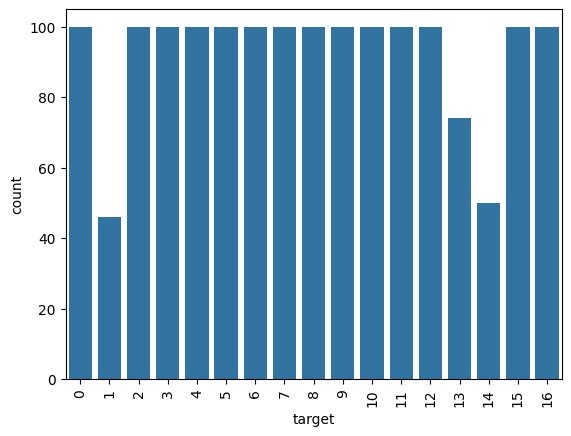

In [4]:
# 라벨 분포 확인

train_df = pd.read_csv("/root/cv_data/train.csv")
print(train_df['target'].value_counts())

sns.countplot(x="target", data=train_df)
plt.xticks(rotation=90)
plt.show()

In [6]:
meta_df = pd.read_csv('/root/cv_data/meta.csv')
meta_df.head()

,target,class_name
0,0,account_number
1,1,application_for_payment_of_pregnancy_medical_e...
2,2,car_dashboard
3,3,confirmation_of_admission_and_discharge
4,4,diagnosis


In [7]:
# 중복 확인

dup = train_df.duplicated().sum()
print(f"중복 행 개수: {dup}")

중복 행 개수: 0


In [9]:
import os

print(os.listdir())
print(os.listdir("train"))

['code1.ipynb', 'code2.ipynb', '[Image Classification] 베이스라인 코드 해설.ipynb', 'EDA.ipynb']


FileNotFoundError: [Errno 2] No such file or directory: 'train'

In [10]:
# 이미지 크기/채널 확인

from PIL import Image
import os

base_path = Path('..') / 'train'
sample_file = train_df.iloc[0]['ID']

sample_img = Image.open(base_path / sample_file)
print(sample_img.size, sample_img.mode)


(443, 591) RGB


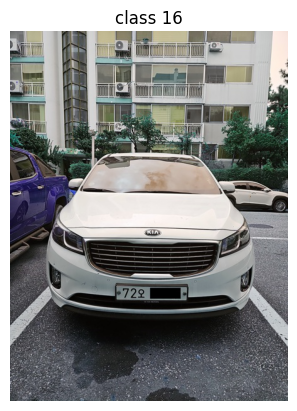

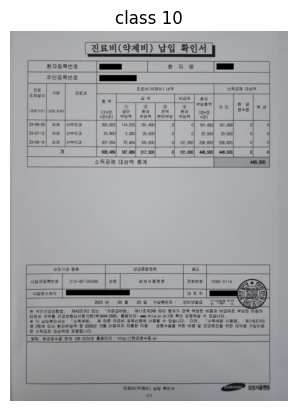

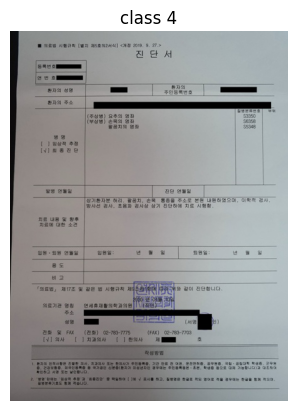

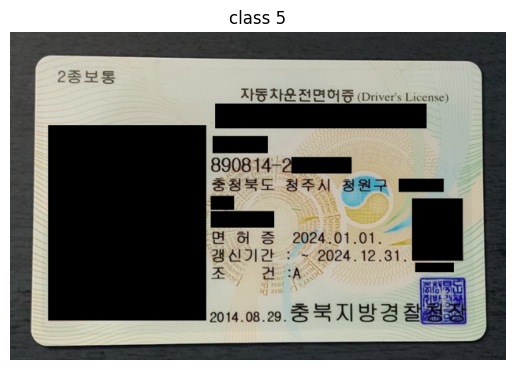

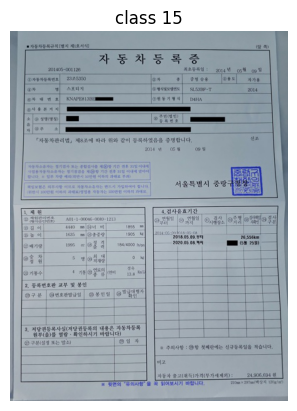

In [12]:
import matplotlib.pyplot as plt

ROOT = Path.cwd().parent
TRAIN_DIR = ROOT / 'train'

for cls in train_df['target'].unique()[:5]:
    sample = train_df[train_df['target']==cls].iloc[0]
    img_path = TRAIN_DIR / sample['ID']
    assert img_path.exists(), f"파일 없음 : {img_path}"
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(f'class {cls}')
    plt.axis('off')
    plt.show()
